In [1]:
import ROOT
from ROOT import larlite
from ROOT import TFile, TH1D
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
import root_numpy as rn
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import simps,trapz
import matplotlib
%matplotlib inline

matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{xfrac,fontspec,unicode-math}"]
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{mathastext}"]
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
font = 22   
legendfont = 18
matplotlib.rc('font',weight='bold')
matplotlib.rc('font',size=font)


/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
def getXSection(N_sig,N_bkgd,N_targ,eff,flux):
    
    xsec = float(N_sig - N_bkgd)/(N_targ * eff * flux)
    return xsec

In [3]:
#f = TFile("../CalcEfficiency/mac/numode_bnb_470m_r200.root")
f = TFile('Files/FluxHist_LatestFlux_volAVTPC.root')

data_pot = 0.492 
sample_pot = 4.232

print sample_pot, data_pot

numu = f.Get("numu")
numu = TH1D(numu)
mean = numu.GetMean() *1000
mean_err = numu.GetStdDev() * 1000 

flux_pot = 1. #e+20
#numu.Scale(sample_pot/flux_pot)
numu.Scale(data_pot/flux_pot)

int_flux = numu.Integral() #0,1000) #6,199) #(10,41)
#mean = 0.9818 # From TheFlux script 0.5 -> 2.0 GeV

print("MCC8 BNB Cos Flux: {:.10e} at mean energy: {:.2f} MeV".format(int_flux,mean*1000))

4.232 0.492
MCC8 BNB Cos Flux: 3.5144062661e+10 at mean energy: 823876.94 MeV


In [4]:
print mean, mean_err
print int_flux

823.8769443 522.689294922
35144062660.7


In [5]:
print numu.Integral()
print numu.Integral(0,49)

35144062660.7
34779864408.4


In [6]:
flux_v, edges = rn.hist2array(hist=numu,return_edges=True)
left, right = edges[0][:-1], edges[0][1:]
energy_bins = np.array([left,right]).T.flatten()
flux_bins = np.array([flux_v,flux_v]).T.flatten()

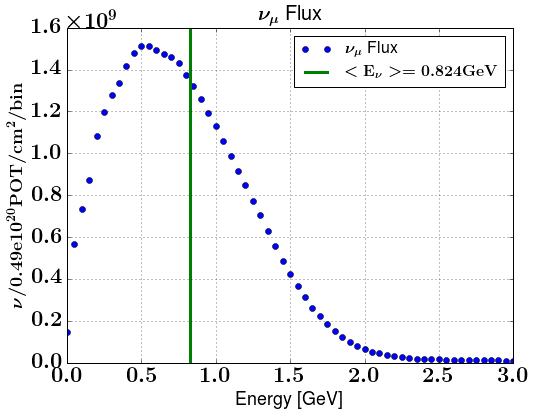

In [7]:
# Check whether or not this is the scaled flux
data_pot_plt = data_pot
#data_pot_plt = sample_pot
plot_mean = mean / 1000

energy_plot = np.arange(0.,10,0.05)
plt.figure(figsize=(8,6))

plt.plot(energy_plot,flux_v,'bo',label="$\\nu_\mu$ Flux")
plt.grid(True)#,which='both')
plt.xlabel("Energy [GeV]",fontsize=18)
#plt.ylabel("#$\\nu /%.3f * 10^{20} POT / cm^2/bin$" % sample_pot,fontsize=18)
plt.ylabel(r'$\mathrm{#\nu /%.2fe10^{20} POT / cm^2/bin}$' % data_pot_plt,fontsize=18)
plt.title("$\\nu_\mu$ Flux",fontsize=20)
plt.axvline(mean/1000,color='g',lw=3,label =r'$\mathrm{ <E_{\nu}> = %.3f GeV}$'%plot_mean)
plt.legend(loc=0,fontsize=16)
plt.xlim(0,3)
#plt.savefig("Plots/Misc_numu_MC_flux.png")
plt.savefig("Plots/Misc_numu_flux.png")

In [8]:
import math
# Get these arrays by running CCpizero.C macro

ar = [0, 0, 0, 0, 0, 0.0229093, 1.0723, 1.90449, 3.23396, 7.86106, 12.667, 17.1546, 22.4787, 32.5825, 42.9095, 97.1394, 282.666]
ar_nomes = [0, 0, 0, 0, 0, 0.0229093, 1.0723, 1.90449, 2.99262, 6.23519, 8.76319, 10.0212, 12.2872, 14.6504, 15.5506, 18.9289,21.1592]
car = [0, 0, 0, 0, 0.00861061, 0.244294, 0.598569, 1.03631, 2.35223, 3.74506]
car_nomes = [0, 0, 0, 0, 0.00861061, 0.241255, 0.579511, 0.963606, 1.79008, 2.2646]

#ar_new_e_i = [150 + 50*i for i in xrange(58)]
#ca_new_e_i = [150 + 50*i for i in xrange(58)]

ca_new_e = [0,150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 850, 900, 1000, 1050, 1150, 1350, 1550, 1750, 1950, 2150, 2350, 2550, 2750, 2950,3000]
ca_new = [ 0,0, 0, 0, 0, 0.000531558, 0.00517706, 0.0245058, 0.0716001, 0.137447, 0.207682, 0.290667, 0.376471, 0.460233, 0.650476, 0.735817, 0.960578, 1.08379, 1.33004, 1.89144, 2.45592, 3.02327, 3.59873, 4.1713, 4.73762, 5.33088, 5.94246, 6.5243, 6.69056]
ca_new_nomes = [0,0, 0, 0, 0, 0.000531558, 0.00517706, 0.0245058, 0.0715501, 0.137262, 0.206897, 0.288696, 0.372122, 0.452193, 0.628048, 0.703058, 0.889665, 0.985552, 1.15994, 1.50755, 1.80779, 2.07147, 2.3237, 2.53829, 2.75867, 2.95628, 3.15192, 3.32696, 3.37403]

ar_new_e = [0,150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 850, 900, 1000, 1050, 1150, 1350, 1550, 1750, 1950, 2150, 2350, 2550, 2750, 2950,3000]
ar_new = [0,0, 0, 0, 0, 0.00208776, 0.0173913, 0.0789304, 0.23783, 0.471047, 0.720702, 0.990544, 1.2977, 1.60962, 2.26416, 2.58029, 3.32419, 3.72691, 4.60238, 6.38735, 8.29866, 10.2217, 12.083, 14.0302, 15.9935, 17.9491, 19.897, 21.8679, 22.364]
ar_new_nomes = [0,0, 0, 0, 0, 0.00208776, 0.0173913, 0.0789304, 0.237695, 0.470639, 0.718938, 0.984316, 1.28636, 1.58624, 2.20196, 2.49241, 3.11981, 3.44616, 4.10415, 5.21186, 6.32499, 7.30089, 8.17303, 9.0706, 9.82058, 10.521, 11.1612, 11.7456, 11.8853]

ar = ar_new; car = ca_new; ar_e = ar_new_e; ca_e = ca_new_e; ar_nomes = ar_new_nomes; car_nomes = ca_new_nomes
#print len(ar_e), len(ar_new), len(ar_new_nomes) 

print len(ar), len(ar_e)

uboone_e = [mean*1000] #981.8]
uboone_e_1show = [mean] #[981.8 - 5]
uboone_e_2show = [mean] #[981.8 + 5]
uboone_xsec = [2.77]
uboone_2show_xsec = [2.64] #3.27]
uboone_1show_xsec = [2.60] #3.07]

uboone_2show_err = [math.sqrt(0.471*0.471 + 0.276*0.276 + 0.331*0.331)]
uboone_1show_err = [math.sqrt(0.322*0.322 + 0.348*0.348 + 0.318*0.318)]
uboone_2show_stat_err = [0.471]
uboone_1show_stat_err = [0.322]

minib_e = [965]
minib_xsec = [.92]
minib_err = [math.sqrt(.15*.15 + 0.03*0.03)]
scib_e = [890]
scib_xsec = [.056 * 13]
scib_err = [0.021 * 13]

#print math.sqrt(0.55*0.55 + 0.36*0.36 + 0.40*0.40)

29 29


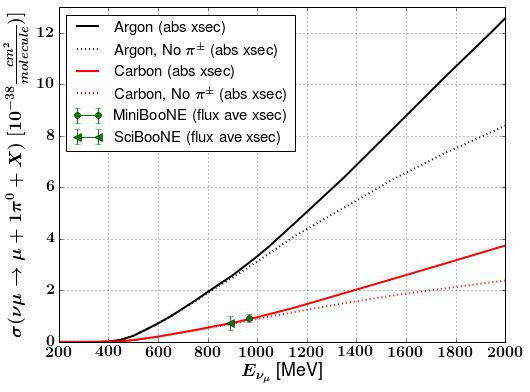

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(ar_e,ar,'k-',label = "Argon (abs xsec)",lw=2)
plt.plot(ar_e,ar_nomes,'k:',label = "Argon, No $\pi^\pm$ (abs xsec)",lw=2)
plt.plot(ca_e,car,'r-',label = "Carbon (abs xsec)",lw=2)
plt.plot(ca_e,car_nomes,'r:',label = "Carbon, No $\pi^\pm$ (abs xsec)" ,lw=2)
plt.errorbar(minib_e,minib_xsec,yerr=minib_err,fmt='-o',color='green',label='MiniBooNE (flux ave xsec)') #,'bo',
plt.errorbar(scib_e,scib_xsec,yerr=scib_err,fmt='-<',ms=8,color='green',label='SciBooNE   (flux ave xsec)') #,'bo',
plt.grid(True)
plt.legend(loc=2,fontsize=15)
ax.set_xlabel(r"$E_{\nu_\mu}$ [MeV]",fontsize=18)
ax.set_ylabel(r'$\sigma(\nu\mu \rightarrow \mu + 1\pi^0 + X) \ [10^{-38}\frac{cm^2}{molecule})]$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(200,2000)
plt.ylim(0,13) #5.5)
plt.savefig("Plots/GenieTruth_Prediction.png")


In [24]:
flux_v, edges = rn.hist2array(hist=numu,return_edges=True)
left, right = edges[0][:-1], edges[0][1:]
energy_bins = np.array([left,right]).T.flatten()
flux_bins = np.array([flux_v,flux_v]).T.flatten()

energy_bins *= 1000
area = np.sum(flux_bins)
flux_bins_area_v = flux_bins / area * 700

area = np.sum(flux_v)
flux_area_v = flux_v / area * 100
print len(edges[0]), len(flux_v)

201 200


In [25]:
sum_flux_xsec = 0

temp_int_flux = numu.Integral(0,49)

for i in xrange(1,len(edges[0])):
    for j in xrange(len(ar_e)):
        if ar_e[j] == int(edges[0][i]*1000) :
            sum_flux_xsec += (flux_v[i-1] * ar[j]) / int_flux
            #print "IN " , ar_e[j], ", ", ar[j], ", ", flux_v[i]
            break
        elif ar_e[j] > int(edges[0][i]*1000):
             break

#print int_flux
print sum_flux_xsec 

1.15830997513


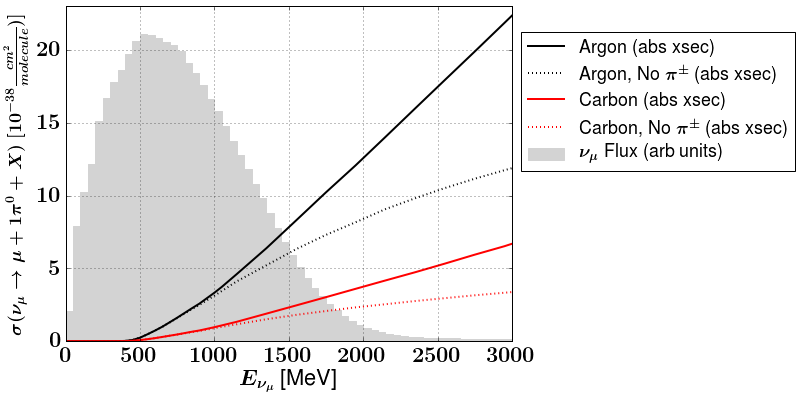

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
ax.fill_between(energy_bins,0,flux_bins_area_v*1.4,color='lightgrey',label="$\\nu_\mu$ Flux (arb units)")
plt.plot(ar_e,ar,'k-',label = "Argon (abs xsec)",lw=2)
plt.plot(ar_e,ar_nomes,'k:',label = "Argon, No $\pi^\pm$ (abs xsec)",lw=2)
plt.plot(ca_e,car,'r-',label = "Carbon (abs xsec)",lw=2)
plt.plot(ca_e,car_nomes,'r:',label = "Carbon, No $\pi^\pm$ (abs xsec)",lw=2)
plt.grid(True)#,which='both')

ax.set_xlabel(r"$E_{\nu_\mu}$ [MeV]",fontsize=font)
ax.set_ylabel(r'$\sigma(\nu_{\mu} \rightarrow \mu + 1\pi^0 + X) \ [10^{-38}\frac{cm^2}{molecule})]$',fontsize=18)
plt.xlim(0,3000)
plt.ylim(0,23) 

lines, labels = ax.get_legend_handles_labels()
lgd = ax.legend(lines,labels,loc='upper left',bbox_to_anchor=(1.,0.95),fontsize=18,numpoints=1)

plt.savefig("Plots/GenieTruth_flux_and_curves.png",bbox_extra_artists=(lgd,), bbox_inches='tight')


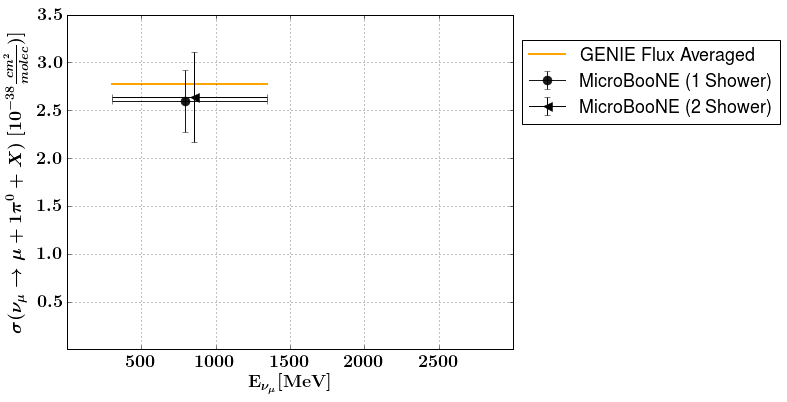

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot( (mean-mean_err,mean+mean_err),(2.78,2.78),lw=2,color='orange',label='GENIE Flux Averaged')
ax.errorbar(uboone_e_1show[0],uboone_1show_xsec[0],xerr=mean_err,fmt='-.',color='k',ms=7,alpha=0.9,zorder=10) 
ax.errorbar(uboone_e_2show[0],uboone_2show_xsec[0],xerr=mean_err,fmt='-.',color='k',ms=5,zorder=10)#,label='MicroBooNE (2 Shower)') #,'bo',
ax.errorbar(uboone_e_1show[0]-30,uboone_1show_xsec[0],yerr=uboone_1show_stat_err[0],fmt='-o',color='k',ms=9,alpha=0.9,zorder=10,label='MicroBooNE (1 Shower)')
ax.errorbar(uboone_e_2show[0]+30,uboone_2show_xsec[0],yerr=uboone_2show_stat_err[0],fmt='-<',color='k',ms=9,zorder=10,label='MicroBooNE (2 Shower)')
ax.set_ylabel(r'$\sigma(\nu_{\mu} \rightarrow \mu + 1\pi^0 + X) \ [10^{-38}\frac{cm^2}{molec})]$',fontsize=18)
ax.set_xlabel(r'$\mathrm{E_{\nu_\mu} [MeV]}')
ax.grid(True)

for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)

ax.set_xlim([0.1,2999])
ax.set_ylim([0.001,3.5])

lines, labels = ax.get_legend_handles_labels()
lgd = ax.legend(lines,labels,loc='upper left',bbox_to_anchor=(1.,0.95),fontsize=18,numpoints=1)

plt.savefig("Plots/GenieTruth_measured.png",bbox_extra_artists=(lgd,), bbox_inches='tight')


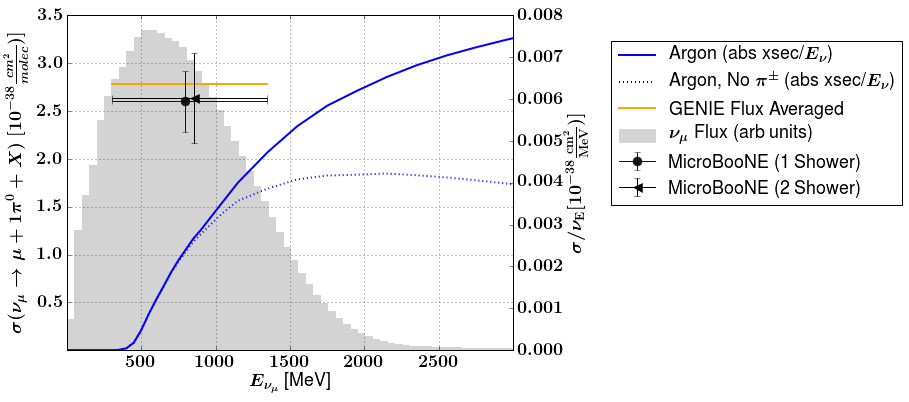

In [32]:
ar_f = [ ar[i] / ar_e[i] if ar_e[i]!=0 else 0 for i in xrange(len(ar)) ]
ar_nomes_f = [ ar_nomes[i] / ar_e[i] if ar_e[i]!=0 else 0 for i in xrange(len(ar)) ]

ca_f = [ car[i] / ca_e[i] if ca_e[i]!=0 else 0 for i in xrange(len(car)) ]
ca_nomes_f = [ car_nomes[i] / ca_e[i] if ca_e[i]!=0 else 0 for i in xrange(len(car)) ]
div = 1

fig, ax = plt.subplots(figsize=(8,6))
ax.fill_between(energy_bins,0,flux_bins_area_v/4.5,color='lightgrey',label="$\\nu_\mu$ Flux (arb units)")
ax.plot( (mean-mean_err,mean+mean_err),(2.78,2.78),lw=2,color='orange',label='GENIE Flux Averaged')
ax.errorbar(uboone_e_1show[0],uboone_1show_xsec[0],xerr=mean_err,fmt='-.',color='k',ms=7,alpha=0.9,zorder=10) 
ax.errorbar(uboone_e_2show[0],uboone_2show_xsec[0],xerr=mean_err,fmt='-.',color='k',ms=5,zorder=10)#,label='MicroBooNE (2 Shower)') #,'bo',
ax.errorbar(uboone_e_1show[0]-30,uboone_1show_xsec[0],yerr=uboone_1show_stat_err[0],fmt='-o',color='k',ms=9,alpha=0.9,zorder=10,label='MicroBooNE (1 Shower)')
ax.errorbar(uboone_e_2show[0]+30,uboone_2show_xsec[0],yerr=uboone_2show_stat_err[0],fmt='-<',color='k',ms=9,zorder=10,label='MicroBooNE (2 Shower)')
ax.set_ylabel(r'$\sigma(\nu_{\mu} \rightarrow \mu + 1\pi^0 + X) \ [10^{-38}\frac{cm^2}{molec})]$',fontsize=18)
ax.set_xlabel(r'$\mathrm{E_{\nu_\mu} [MeV]}')
ax.grid(True)

ax2 = ax.twinx()
ax2.plot(ar_e,ar_f,'b-',label = "Argon (abs xsec/$E_\\nu$)",lw=2)
ax2.plot(ar_e,ar_nomes_f,'b:',label = "Argon, No $\pi^\pm$ (abs xsec/$E_\\nu$)",lw=2)
#ax2.set_ylabel(r'$\sigma(\nu_{\mu} \rightarrow \mu + 1\pi^0 + X)$ / $\nu_E$ $[10^{-38}\frac{cm^2}{MeV*molec})]$',fontsize=18)
ax2.set_ylabel(r'$\mathrm{\sigma / \nu_E [10^{-38}\frac{cm^2}{MeV})]}$',fontsize=18)

for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)

for item in ([ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(18)
    
ax.set_xlim([0.1,2999])
ax.set_ylim([0.001,3.5])

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lgd = ax2.legend(lines2 + lines, labels2 + labels,loc='upper left',bbox_to_anchor=(1.2,0.95),fontsize=18,numpoints=1)

plt.savefig("Plots/GenieTruth_stat.png",bbox_extra_artists=(lgd,), bbox_inches='tight')


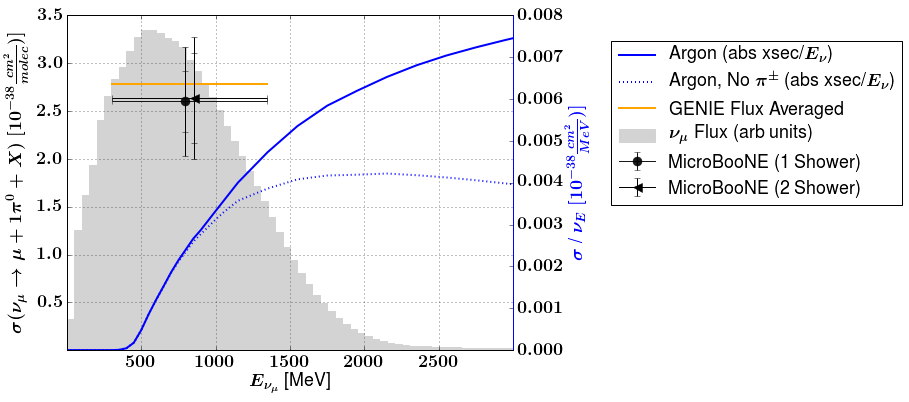

In [30]:
ar_f = [ ar[i] / ar_e[i] if ar_e[i]!=0 else 0 for i in xrange(len(ar)) ]
ar_nomes_f = [ ar_nomes[i] / ar_e[i] if ar_e[i]!=0 else 0 for i in xrange(len(ar)) ]

ca_f = [ car[i] / ca_e[i] if ca_e[i]!=0 else 0 for i in xrange(len(car)) ]
ca_nomes_f = [ car_nomes[i] / ca_e[i] if ca_e[i]!=0 else 0 for i in xrange(len(car)) ]
div = 1

fig, ax = plt.subplots(figsize=(8,6))
ax.fill_between(energy_bins,0,flux_bins_area_v/4.5,color='lightgrey',label="$\\nu_\mu$ Flux (arb units)")
ax.plot( (mean-mean_err,mean+mean_err),(2.78,2.78),lw=2,color='orange',label='GENIE Flux Averaged')
ax.errorbar(uboone_e_1show[0],uboone_1show_xsec[0],xerr=mean_err,fmt='-.',color='k',ms=7,alpha=0.9,zorder=10) 
ax.errorbar(uboone_e_2show[0],uboone_2show_xsec[0],xerr=mean_err,fmt='-.',color='k',ms=5,zorder=10)#,label='MicroBooNE (2 Shower)') #,'bo',
ax.errorbar(uboone_e_1show[0]-30,uboone_1show_xsec[0],yerr=uboone_1show_err[0],color='k',zorder=10)
ax.errorbar(uboone_e_2show[0]+30,uboone_2show_xsec[0],yerr=uboone_2show_err[0],color='k',zorder=10)
ax.errorbar(uboone_e_1show[0]-30,uboone_1show_xsec[0],yerr=uboone_1show_stat_err[0],fmt='-o',color='k',ms=9,alpha=0.9,zorder=10,label='MicroBooNE (1 Shower)')
ax.errorbar(uboone_e_2show[0]+30,uboone_2show_xsec[0],yerr=uboone_2show_stat_err[0],fmt='-<',color='k',ms=9,zorder=10,label='MicroBooNE (2 Shower)')
ax.set_ylabel(r'$\sigma(\nu_{\mu} \rightarrow \mu + 1\pi^0 + X) \ [10^{-38}\frac{cm^2}{molec})]$',fontsize=18)
ax.set_xlabel(r'$E_{\nu_\mu}$ [MeV]')
ax.grid(True)

ax2 = ax.twinx()
ax2.plot(ar_e,ar_f,'b-',label = "Argon (abs xsec/$E_\\nu$)",lw=2)
ax2.plot(ar_e,ar_nomes_f,'b:',label = "Argon, No $\pi^\pm$ (abs xsec/$E_\\nu$)",lw=2)
#ax2.plot(ca_e,ca_f,'r-',label = "Carbon (abs xsec/$E_\nu$)",lw=2)
#ax2.plot(ca_e,ca_nomes_f,'r:',label = "Carbon, No $\pi^\pm$ (abs xsec/$E_\nu$)",lw=2)
#plt.errorbar(minib_e,minib_xsec,yerr=minib_err,fmt='-o',ms=6,color='green',label='MiniBooNE',lw=2) 
#plt.errorbar(scib_e,scib_xsec,yerr=scib_err,fmt='-<',ms=8,color='green',label='SciBooNE',lw=2)
ax2.set_ylabel(r'$\sigma(\nu_{\mu} \rightarrow \mu + 1\pi^0 + X)$ / $\nu_E$ $[10^{-38}\frac{cm^2}{MeV*molec})]$',fontsize=22,color='b')
ax2.set_ylabel(r'$\sigma$ / $\nu_E$ $[10^{-38}\frac{cm^2}{MeV})]$',fontsize=22)
ax2.spines['right'].set_color('blue')
for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)

for item in ([ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(18)
    
ax.set_xlim([0.1,2999])
ax.set_ylim([0.001,3.5])

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lgd = ax2.legend(lines2 + lines, labels2 + labels,loc='upper left',bbox_to_anchor=(1.2,0.95),fontsize=18,numpoints=1)
plt.savefig("Plots/GenieTruth_stat_sys.png",bbox_extra_artists=(lgd,), bbox_inches='tight')


[2.64] [2.6] [823.8769442995879] [823.8769442995879]


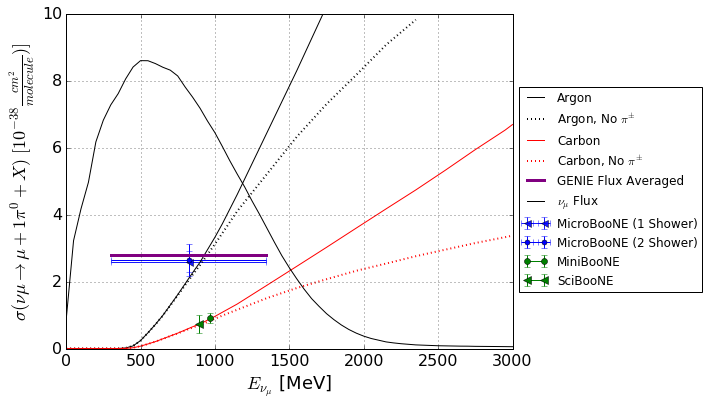

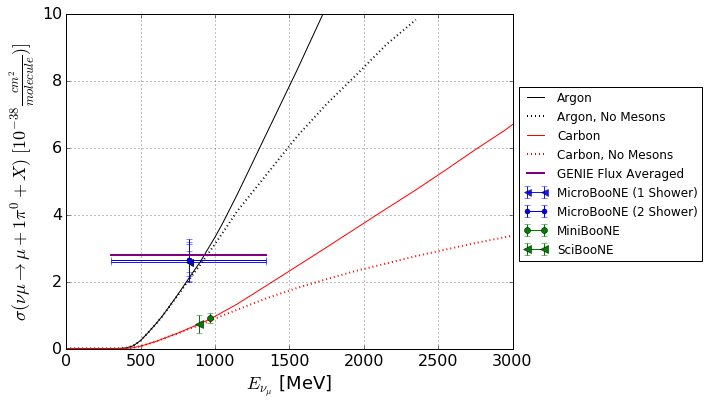

In [288]:
energy_plot = np.arange(0.,10000,50)
area = np.sum(flux_v)
flux_area_v = flux_v / area * 200

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(ar_e,ar,'k-',label = "Argon",lw=1)
plt.plot(ar_e,ar_nomes,'k:',label = "Argon, No $\pi^{\pm}$",lw=2)
plt.plot(ca_e,car,'r-',label = "Carbon",lw=1)
plt.plot(ca_e,car_nomes,'r:',label = "Carbon, No $\pi^{\pm}$",lw=2)
plt.plot( (mean - mean_err,mean + mean_err),(2.78,2.78),lw=3,color='purple',label='GENIE Flux Averaged')
plt.plot(energy_plot,flux_area_v,'k-',label="$\\nu_\mu$ Flux")
plt.errorbar(uboone_e_1show,uboone_1show_xsec,xerr=mean_err,yerr=uboone_1show_stat_err,fmt='-<',color='blue',ms=7,alpha=0.9,label='MicroBooNE (1 Shower)') #,'bo',
plt.errorbar(uboone_e_2show,uboone_2show_xsec,xerr=mean_err,yerr=uboone_2show_stat_err,fmt='-o',color='blue',ms=5,label='MicroBooNE (2 Shower)') #,'bo',
plt.errorbar(minib_e,minib_xsec,yerr=minib_err,fmt='-o',color='green',label='MiniBooNE') #,'bo',
plt.errorbar(scib_e,scib_xsec,yerr=scib_err,fmt='-<',ms=8,color='green',label='SciBooNE') #,'bo',
plt.grid(True)#,which='both')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.8))
ax.set_xlabel(r"$E_{\nu_\mu}$ [MeV]",fontsize=18)
ax.set_ylabel(r'$\sigma(\nu\mu \rightarrow \mu + 1\pi^0 + X) \ [10^{-38}\frac{cm^2}{molecule})]$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,3000)
plt.ylim(0,10)
plt.savefig("Plots/GenieTruth_stat.png")

print uboone_2show_xsec, uboone_1show_xsec, uboone_e_1show, uboone_e_1show

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(ar_e,ar,'k-',label = "Argon",lw=1)
plt.plot(ar_e,ar_nomes,'k:',label = "Argon, No Mesons",lw=2)
plt.plot(ca_e,car,'r-',label = "Carbon",lw=1)
plt.plot(ca_e,car_nomes,'r:',label = "Carbon, No Mesons",lw=2)
plt.plot( (mean - mean_err,mean + mean_err),(2.78,2.78),lw=2,color='purple',label='GENIE Flux Averaged')
plt.errorbar(uboone_e_1show,uboone_1show_xsec,xerr=mean_err, yerr=uboone_1show_stat_err,fmt='-<',color='blue',ms=7,alpha=0.9) #,'bo',
plt.errorbar(uboone_e_2show,uboone_2show_xsec,xerr=mean_err,yerr=uboone_2show_stat_err,fmt='-o',color='blue',ms=5)
plt.errorbar(uboone_e_1show,uboone_1show_xsec,yerr=uboone_1show_err,fmt='-<',color='blue',ms=7,alpha=0.9,label='MicroBooNE (1 Shower)') #,'bo',
plt.errorbar(uboone_e_2show,uboone_2show_xsec,yerr=uboone_2show_err,fmt='-o',color='blue',ms=5,label='MicroBooNE (2 Shower)') #,'bo',
plt.errorbar(minib_e,minib_xsec,yerr=minib_err,fmt='-o',color='green',label='MiniBooNE') #,'bo',
plt.errorbar(scib_e,scib_xsec,yerr=scib_err,fmt='-<',ms=8,color='green',label='SciBooNE') #,'bo',

plt.grid(True)#,which='both')
plt.legend(loc='upper left',bbox_to_anchor=(1,0.8))
ax.set_xlabel(r"$E_{\nu_\mu}$ [MeV]",fontsize=18)
ax.set_ylabel(r'$\sigma(\nu\mu \rightarrow \mu + 1\pi^0 + X) \ [10^{-38}\frac{cm^2}{molecule})]$',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(0,3000)
plt.ylim(0,10)
plt.savefig("Plots/GenieTruth_stat_sys.png")